**COVID-19 & EMPLOYABILITY**

BPS 2020 shows that COVID-19 has made a significant impact on employment in Indonesia. Data shows around 2.08 million employees in Indonesia were being laid off or unemployed during and after COVID-19. Whereas, in industries' perspective, there was a significant increase for them who experienced a decreased revenue, it started from 70.67% to 87.93%.

In this project, I did a little exploratory analysis using **population's proportion test** and **Linear Regression test** on a dataset that I got from BPS 2020 to show some correlation and its impact on employability in Indonesia given by COVID-19 in 2020. The dataset itself is a survey result from 500 employees in Indonesia who were affected or not affected by COVID-19.

The dataset consists of 9 columns, there are:
1. ID (respondent's unique ID)
2. Jenis Kelamin (respondent's gender)
3. Domisili (respondent's origin)
4. Pendidikan (respondent's education)
5. Status_1 (respondent's employment status: permanent, contract, outsource)
6. Status_2 (respondent's work status: work, sent home, laid off)
7. Sektor (respondent's work sector)
8. Posisi (respondent's work position)
9. Perf_Score (respondent's work performance score: 0 to 1)

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats.distributions as dist
import warnings
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

warnings.filterwarnings('ignore')

## **Data Understanding**

In [40]:
df = pd.read_csv('/content/Data_Dummy_Fix2_Final.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             500 non-null    int64  
 1   Jenis Kelamin  500 non-null    object 
 2   Pendidikan     500 non-null    object 
 3   Domisili       500 non-null    object 
 4   Status_1       500 non-null    object 
 5   Status_2       500 non-null    object 
 6   Sektor         500 non-null    object 
 7   Posisi         500 non-null    object 
 8   Perf_Score     500 non-null    float64
dtypes: float64(1), int64(1), object(7)
memory usage: 35.3+ KB


In [41]:
df.head()

,ID,Jenis Kelamin,Pendidikan,Domisili,Status_1,Status_2,Sektor,Posisi,Perf_Score
0,100201,Laki-Laki,Diploma,Sulawesi Selatan,Kontrak,Bekerja,Industri Pengolahan,Marketing,0.66
1,100202,Laki-Laki,SMA,Kalimantan Utara,Pegawai Tetap,PHK,Listrik & Gas,Accounting,0.94
2,100203,Laki-Laki,Diploma,Sulawesi Utara,Kontrak,Bekerja,Akomodasi & Makanan Minuman,Administration,0.48
3,100204,Laki-Laki,Sarjana,Bali,Outsource,Bekerja,Transportasi & Pergudangan,Researcher,0.62
4,100205,Laki-Laki,Sarjana,Aceh,Outsource,Bekerja,Penjualan Online,Researcher,0.61


In [42]:
# Check for missing values
df.isnull().sum()

ID               0
Jenis Kelamin    0
Pendidikan       0
Domisili         0
Status_1         0
Status_2         0
Sektor           0
Posisi           0
Perf_Score       0
dtype: int64

In [43]:
# Check the sum of values in each column
print(df['Status_1'].value_counts())
print('=================================')
print(df['Status_2'].value_counts())
print('=================================')
print(df['Jenis Kelamin'].value_counts())
print('=================================')
print(df['Pendidikan'].value_counts())
print('=================================')
print(df['Sektor'].value_counts())
print('=================================')
print(df['Posisi'].value_counts())
print('=================================')
print(df['Domisili'].value_counts())

Kontrak          225
Pegawai Tetap    221
Outsource         54
Name: Status_1, dtype: int64
Bekerja       198
Dirumahkan    188
PHK           114
Name: Status_2, dtype: int64
Laki-Laki    320
Perempuan    180
Name: Jenis Kelamin, dtype: int64
SMK        158
SMA        134
Sarjana     89
Diploma     75
SMP         44
Name: Pendidikan, dtype: int64
Akomodasi & Makanan Minuman    136
Industri Pengolahan             67
Listrik & Gas                   58
Jasa Keuangan & Asuransi        58
E-Commerce                      53
Penjualan Online                44
Transportasi & Pergudangan      38
Real Estate                     29
Penerbangan                     17
Name: Sektor, dtype: int64
Cleaning Service    101
Accounting           75
Researcher           75
Operation            75
IT Staff             70
Administration       55
Marketing            43
Manager               6
Name: Posisi, dtype: int64
Nusa Tenggara Timur    24
Bali                   23
Kalimantan Selatan     21
Kalimantan T

## **Data Preparation**

In [44]:
# Categorize the employed and unemployed employees
Status = []
for i in df['Status_2']:
  if i == 'Bekerja':
    Status.append('Employed')
  else:
    Status.append('Unemployed')
df['Status'] = Status
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             500 non-null    int64  
 1   Jenis Kelamin  500 non-null    object 
 2   Pendidikan     500 non-null    object 
 3   Domisili       500 non-null    object 
 4   Status_1       500 non-null    object 
 5   Status_2       500 non-null    object 
 6   Sektor         500 non-null    object 
 7   Posisi         500 non-null    object 
 8   Perf_Score     500 non-null    float64
 9   Status         500 non-null    object 
dtypes: float64(1), int64(1), object(8)
memory usage: 39.2+ KB


In [45]:
# Labelling the categorical columns
Pendidikan = []
for i in df['Pendidikan']:
  if i == 'SMP':
    Pendidikan.append(0)
  elif i == 'SMA':
    Pendidikan.append(1)
  elif i == 'SMK':
    Pendidikan.append(2)
  elif i == 'Diploma':
    Pendidikan.append(3)
  else:
    Pendidikan.append(4)

Jenis = []
for i in df['Jenis Kelamin']:
  if i == 'Laki-Laki':
    Jenis.append(0)
  else:
    Jenis.append(1)

Sektor = []
for i in df['Sektor']:
  if i == 'Penerbangn':
    Sektor.append(0)
  elif i == 'E-Commerce':
    Sektor.append(1)
  elif i == 'Listrik & Gas':
    Sektor.append(2)
  elif i == 'Jasa Keuangan & Asuransi':
    Sektor.append(3)
  elif i == 'Real Estate':
    Sektor.append(4)
  elif i == 'Akomodasi & Makanan Minuman':
    Sektor.append(5)
  elif i == 'Industri Pengolahan':
    Sektor.append(6)
  elif i == 'Transportasi & Pergudangan':
    Sektor.append(7)
  else:
    Sektor.append(8)

Posisi = []
for i in df['Posisi']:
  if i == 'Manager':
    Posisi.append(0)
  elif i == 'Accounting':
    Posisi.append(1)
  elif i == 'Cleaning Service':
    Posisi.append(2)
  elif i == 'IT Staff':
    Posisi.append(3)
  elif i == 'Operation':
    Posisi.append(4)
  elif i == 'Administration':
    Posisi.append(5)
  elif i == 'Marketing':
    Posisi.append(6)
  elif i == 'Researcher':
    Posisi.append(7)
  else:
    Posisi.append(8)

Status_1 = []
for i in df['Status_1']:
  if i == 'Pegawai Tetap':
    Status_1.append(0)
  elif i == 'Kontrak':
    Status_1.append(1)
  else:
    Status_1.append(2)

Status_2 = []
for i in df['Status_2']:
  if i == 'Bekerja':
    Status_2.append(0)
  elif i == 'Dirumahkan':
    Status_2.append(1)
  else:
    Status_2.append(2)

Status = []
for i in df['Status']:
  if i == 'Employed':
    Status.append(0)
  else:
    Status.append(1)

df_labeled = pd.DataFrame({'ID':df['ID'], 'Jenis Kelamin':Jenis, 'Domisili':LabelEncoder().fit_transform(df['Domisili']), 'Pendidikan':Pendidikan, 
                           'Status_1':Status_1, 'Status_2':Status_2, 'Sektor':Sektor, 'Posisi':Posisi, 'Perf_Score':df['Perf_Score'],
                           'Status':Status})
df_labeled.head()

,ID,Jenis Kelamin,Domisili,Pendidikan,Status_1,Status_2,Sektor,Posisi,Perf_Score,Status
0,100201,0,26,3,1,0,6,6,0.66,0
1,100202,0,15,1,0,2,2,1,0.94,1
2,100203,0,29,3,1,0,5,5,0.48,0
3,100204,0,1,4,2,0,7,7,0.62,0
4,100205,0,0,4,2,0,8,7,0.61,0


In [46]:
# Showing employed & unemployed numbers
status = pd.DataFrame({'Jumlah':df.groupby('Status')['Status'].count()})
status

,Jumlah
Status,
Employed,198
Unemployed,302


In [47]:
# Showing employed & unemployed numbers based on gender
gender = pd.DataFrame({'Jumlah':df.groupby(['Jenis Kelamin'])['Status'].value_counts()}).reset_index()
gender = gender.pivot_table('Jumlah', ['Jenis Kelamin'], 'Status').reset_index()
gender = gender.rename_axis(None, axis=1).fillna(0).set_index('Jenis Kelamin').astype(int)
gender

,Employed,Unemployed
Jenis Kelamin,,
Laki-Laki,127,193
Perempuan,71,109


In [48]:
# Showing employed & unemployed number based on education
education = pd.DataFrame({'Jumlah':df.groupby(['Pendidikan', 'Status'])['Status'].count()}).reset_index()
education = education.pivot_table('Jumlah', ['Pendidikan'], 'Status').reset_index()
education = education.rename_axis(None, axis = 1).fillna(0).set_index('Pendidikan')
education = education.reindex(['SMP', 'SMA', 'SMK', 'Diploma', 'Sarjana'])
education = education.astype(int)
education

,Employed,Unemployed
Pendidikan,,
SMP,2,42
SMA,70,64
SMK,38,120
Diploma,29,46
Sarjana,59,30


In [49]:
# Showing employed and unemployed numbers based on position
position = pd.DataFrame({'Jumlah':df.groupby(['Posisi', 'Status'])['Status'].count()}).reset_index()
position = position.pivot_table('Jumlah', ['Posisi'], 'Status').reset_index()
position = position.rename_axis(None, axis = 1).fillna(0).set_index('Posisi')
position = position.astype(int)
position

,Employed,Unemployed
Posisi,,
Accounting,40,35
Administration,19,36
Cleaning Service,30,71
IT Staff,38,32
Manager,6,0
Marketing,15,28
Operation,2,73
Researcher,48,27


In [50]:
# Showing employed & unemployed numbers based on sector
sector = pd.DataFrame({'Jumlah':df.groupby(['Sektor', 'Status'])['Status'].count()}).reset_index()
sector = sector.pivot_table('Jumlah', ['Sektor'], 'Status').reset_index()
sector = sector.rename_axis(None, axis = 1).fillna(0).set_index('Sektor')
sector = sector.astype(int)
sector

,Employed,Unemployed
Sektor,,
Akomodasi & Makanan Minuman,29,107
E-Commerce,27,26
Industri Pengolahan,26,41
Jasa Keuangan & Asuransi,18,40
Listrik & Gas,33,25
Penerbangan,1,16
Penjualan Online,25,19
Real Estate,18,11
Transportasi & Pergudangan,21,17


In [51]:
# Showing employed & unemployed based on the employment status
status_1 = pd.DataFrame({'Jumlah':df.groupby(['Status_1', 'Status'])['Status'].count()}).reset_index()
status_1 = status_1.pivot_table('Jumlah', ['Status_1'], 'Status').reset_index()
status_1 = status_1.rename_axis(None, axis = 1).fillna(0).set_index('Status_1')
status_1 = status_1.astype(int)
status_1

,Employed,Unemployed
Status_1,,
Kontrak,73,152
Outsource,34,20
Pegawai Tetap,91,130


## **Exploratory Data Analysis**

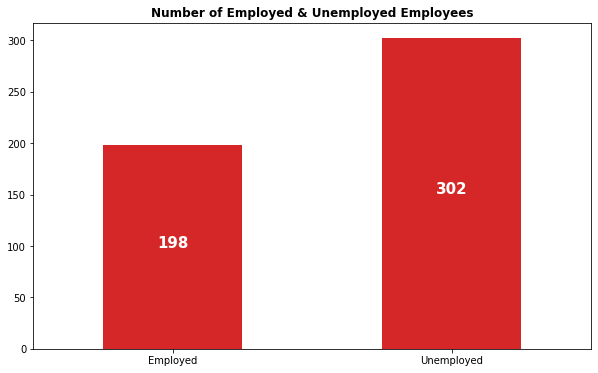

In [52]:
# Bar chart of Employed & unemployed numbers
fig = plt.figure(figsize=(10,6))
ax = plt.subplot2grid((1,1), (0,0))
status.plot.bar(ax=ax, rot=0, color=['tab:red'], legend=None)

def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i]//2, y[i], ha = 'center', color='white', weight='bold', fontsize=15)

addlabels(status.index, status['Jumlah'])

ax.set_xlabel(None)
ax.set_title('Number of Employed & Unemployed Employees', weight='bold')
plt.show()

The number of unemployed is much larger than the number of employed one. In this case, we describe the employed category for those who working even during COVID-19 in 2020. Whereas, the unemployed category is for those of employees who were laid off or sent home by their companies without getting any payment.

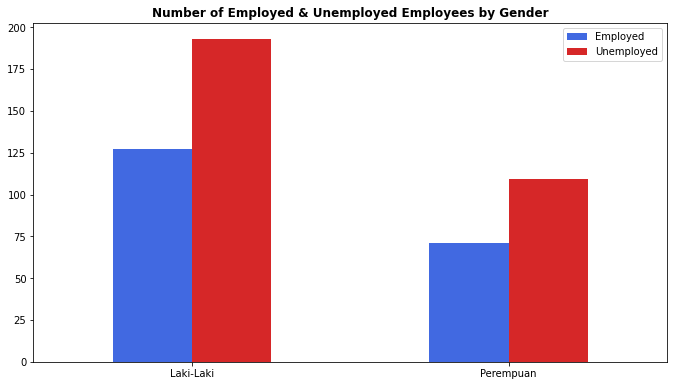

In [53]:
# Bar chart of employed & unemployed number based on gender
fig = plt.figure(figsize=(10,6))
ax0 = plt.subplot2grid((1,1), (0,0))

gender.plot.bar(ax = ax0, rot = 0, color=['royalblue', 'tab:red'])
ax0.set_title('Number of Employed & Unemployed Employees by Gender', weight='bold')
ax0.set_ylabel(None)
ax0.set_xlabel(None)

fig.tight_layout(pad=3)
plt.show()

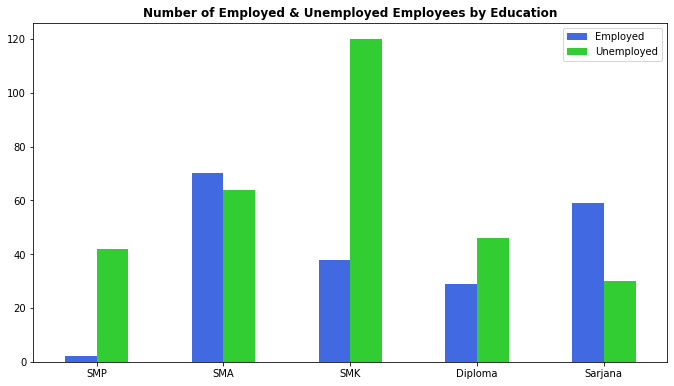

In [54]:
# Bar chart of employed & unemployed numbers based on educaton
fig = plt.figure(figsize=(10,6))
ax0 = plt.subplot2grid((1,1), (0,0))

education.plot.bar(ax = ax0, rot = 0, color=['royalblue', 'limegreen'])
ax0.set_title('Number of Employed & Unemployed Employees by Education', weight='bold')
ax0.set_ylabel(None)
ax0.set_xlabel(None)

fig.tight_layout(pad=3)
plt.show()

SMK has the highest number of the unemployed among those background educations and it is so differ from the number of employed one. It can be seen that employees with educational background from SMK has the highest impact on COVID-19 in 2020.

Besides, only SMA and Sarjana who have the condition where the number of employed is larger than the unemployed one. It may refer that most of the industries attempted to maintain their sustainability by holding some of their employees with educational background from SMA and Sarjana.

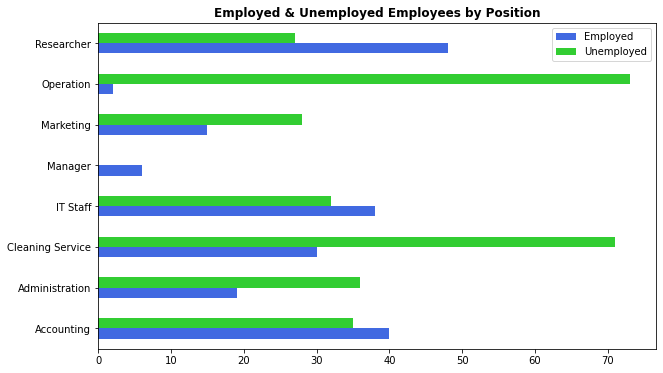

In [55]:
# Horizontal bar chart of employed & unemployed number based on position
fig = plt.figure(figsize=(10,6))
ax0 = plt.subplot2grid((1,1), (0,0))

position.plot.barh(ax = ax0, rot = 0, color=['royalblue', 'limegreen'])
ax0.set_title('Employed & Unemployed Employees by Position', weight='bold')
ax0.set_ylabel(None)
ax0.set_xlabel(None)

plt.show()

Operation and Cleaning Service have the highest number of unemployed among those positions. The gap they have for the employed and unemployed is so much different. It means that operation and cleaning service have the highest impact on COVID-19 in 2020. It also followed by Marketing and Administration.

Besides, Acounting, IT Staff, and Researcher have a diverse condition where the number of employed is larger than the unemployed one even though it is not so much different.

Lastly, only Manager position who has no number of unemployed.

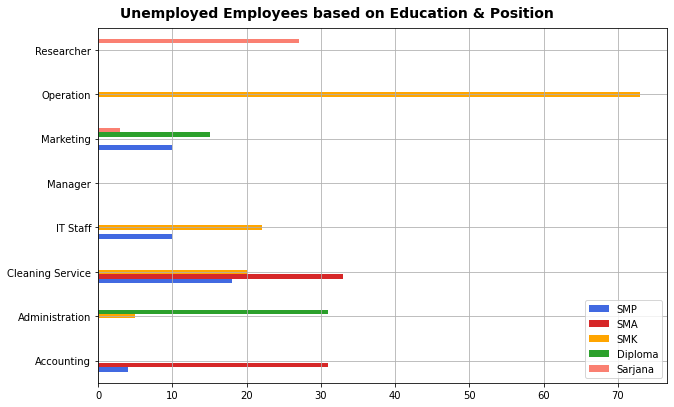

In [56]:
# Horizontal bar chart of unemployed number based on education & position

df_test = pd.DataFrame(df.groupby(['Posisi', 'Pendidikan'])['Status'].value_counts()).rename(columns={'Status':'Jumlah'})
df_test = df_test.pivot_table('Jumlah', ['Posisi', 'Pendidikan'], 'Status').fillna(0)
df_test = df_test.drop(columns = ['Employed']).astype(int)
df_test = df_test.pivot_table('Unemployed', ['Posisi'], 'Pendidikan').fillna(0).astype(int).reset_index()
df_test = df_test[['Posisi', 'SMP', 'SMA', 'SMK', 'Diploma', 'Sarjana']]

fig = plt.figure(figsize=(10,6))
ax = plt.subplot2grid((1,1), (0,0))
fig.suptitle('Unemployed Employees based on Education & Position', fontsize=14, weight='bold')
df_test.plot(ax=ax, kind='barh', rot=0, x='Posisi', color=['royalblue', 'tab:red', 'orange',
                                                   'tab:green', 'salmon'], grid=True)
ax.set_xlabel(None)
ax.set_ylabel(None)
plt.legend(title=None)
plt.tight_layout(pad=3)
plt.show()

If we look deeper based on its educational background, the number of unemployed one in the Operation position is 100% from SMK and Most of the unemployed one in the Cleaning Service position is from SMA.

Moreover, most of the employees with educational background from SMA have been laid off and considered as unemployed one in Cleaning Service and Accounting positions. whereas for SMK, most of them are in Operation, IT Staff, and Cleaning Service.

Otherwise, the number of unemployed employees in Researcher position is 100% from Sarjana and most of the unemployed one in Marketing and Administration is from Diploma.

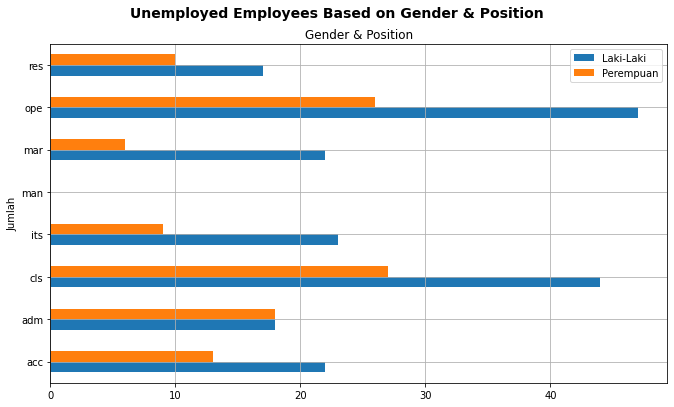


acc : Accounting
adm : Administration
cls : Cleaning Service
its : IT Staff
man : Manager
mar : Marketing
ope : Operation
res : Researcher


In [57]:
# Horizontal bar chart of Unemployed number based on gender & position

df_test = pd.DataFrame(df.groupby(['Posisi', 'Jenis Kelamin'])['Status'].value_counts()).rename(columns={'Status':'Jumlah'})
df_test = df_test.pivot_table('Jumlah', ['Posisi', 'Jenis Kelamin'], 'Status').fillna(0)
df_test = df_test.drop(columns = ['Employed']).astype(int)
df_test = df_test.pivot_table('Unemployed', ['Posisi'], 'Jenis Kelamin').fillna(0).astype(int).reset_index()

fig = plt.figure(figsize=(10,6))
ax = plt.subplot2grid((1,1), (0,0))
fig.suptitle('Unemployed Employees Based on Gender & Position', fontsize=14, weight='bold')
df_test.plot(ax=ax, kind='barh', rot=0, x='Posisi', grid=True)
ax.set_xlabel(None)
ax.set_ylabel('Jumlah')
ax.set_title('Gender & Position')
plt.yticks(ticks=range(0,8), labels=['acc', 'adm', 'cls', 'its', 'man', 'mar', 'ope', 'res'])
plt.legend(title=None)
plt.tight_layout(pad=3)
plt.show()

print('''
acc : Accounting
adm : Administration
cls : Cleaning Service
its : IT Staff
man : Manager
mar : Marketing
ope : Operation
res : Researcher''')

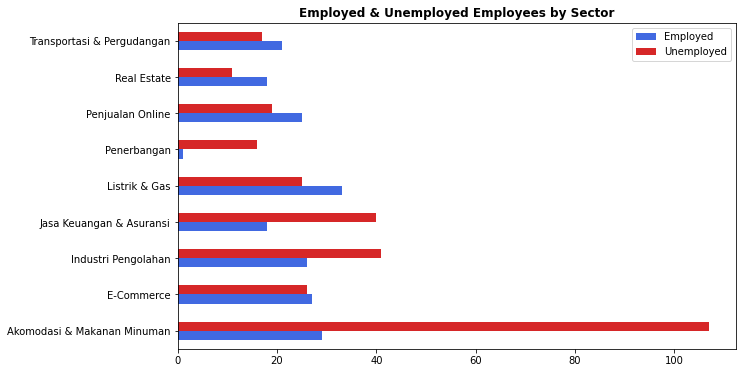

In [58]:
# Horizontal bar chart of employed and unemployed numbers based on sector
fig = plt.figure(figsize=(10,6))
ax0 = plt.subplot2grid((1,1), (0,0))

sector.plot.barh(ax = ax0, rot = 0, color=['royalblue', 'tab:red'])
ax0.set_title('Employed & Unemployed Employees by Sector', weight='bold')
ax0.set_ylabel(None)
ax0.set_xlabel(None)

plt.show()

Akomodasi & Makanan Minuman has the highest number of unemployed among those sectors, followed by Jasa Keuangan & Asuransi and Industri Pengolahan. It also has a pretty large gap between the employed and the unemployed, so is the Penerbangan sector.

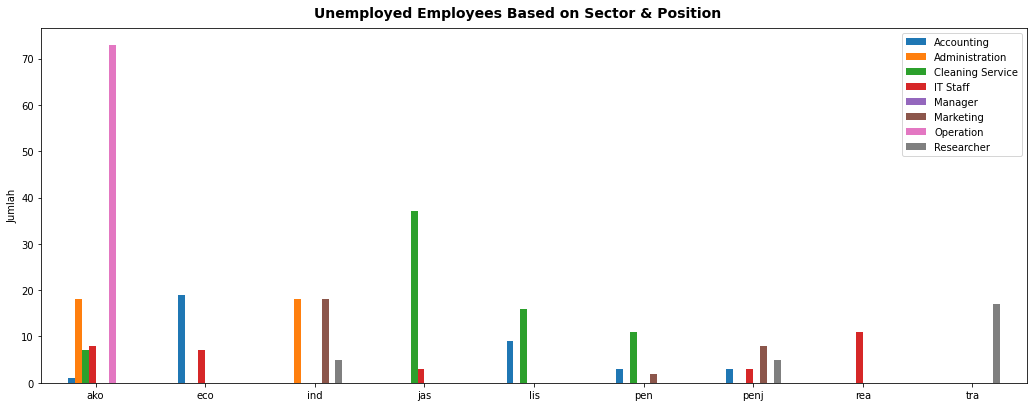


ako : Akomodasi & Makanan Minuman
eco : E-Commerce
ind : Industri Pengolahan
jas : Jasa Keuangan & Asuransi
lis : Listrik & Gas
pen : Penerbangan
pej : Penjualan Online
rea : Real Estate
tra : Transportasi & Pergudangan


In [59]:
# Bar chart of unemployed number based on sector & position

df_test = pd.DataFrame(df.groupby(['Sektor', 'Posisi'])['Status'].value_counts()).rename(columns={'Status':'Jumlah'})
df_test = df_test.pivot_table('Jumlah', ['Sektor', 'Posisi'], 'Status').fillna(0)
df_test = df_test.drop(columns = ['Employed']).astype(int)
df_test = df_test.pivot_table('Unemployed', ['Sektor'], 'Posisi').fillna(0).astype(int).reset_index()

fig = plt.figure(figsize=(15,6))
ax = plt.subplot2grid((1,1), (0,0))
fig.suptitle('Unemployed Employees Based on Sector & Position', fontsize=14, weight='bold')
df_test.plot(ax=ax, kind='bar', rot=0, x='Sektor', grid=False)
ax.set_xlabel(None)
ax.set_ylabel('Jumlah')

plt.xticks(ticks=range(0,9), labels=['ako', 'eco', 'ind', 'jas', 'lis', 'pen', 'penj', 'rea', 'tra'])
plt.legend(title=None)
plt.tight_layout(pad=3)
plt.show()

print('''
ako : Akomodasi & Makanan Minuman
eco : E-Commerce
ind : Industri Pengolahan
jas : Jasa Keuangan & Asuransi
lis : Listrik & Gas
pen : Penerbangan
pej : Penjualan Online
rea : Real Estate
tra : Transportasi & Pergudangan''')

We can see that 100% unemployed employees in Operation position are from Akomodasi & Makanan Minuman sector. Whereas for Cleaning Service, it mostly belongs to Jasa Keuangan & Asuransi, Listrik & Gas, and Penerbangan sectors since it becomes the highest one in these sectors.

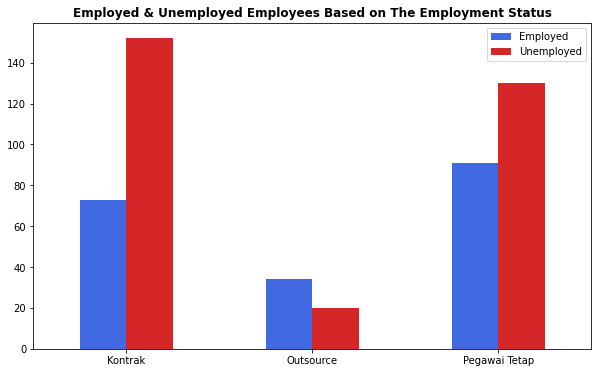

In [60]:
# Bar chart of employed & unemployed numbers based on the employment status
fig = plt.figure(figsize=(10,6))
ax0 = plt.subplot2grid((1,1), (0,0))

status_1.plot.bar(ax = ax0, rot = 0, color=['royalblue', 'tab:red'])
ax0.set_title('Employed & Unemployed Employees Based on The Employment Status', weight='bold')
ax0.set_ylabel(None)
ax0.set_xlabel(None)

plt.show()

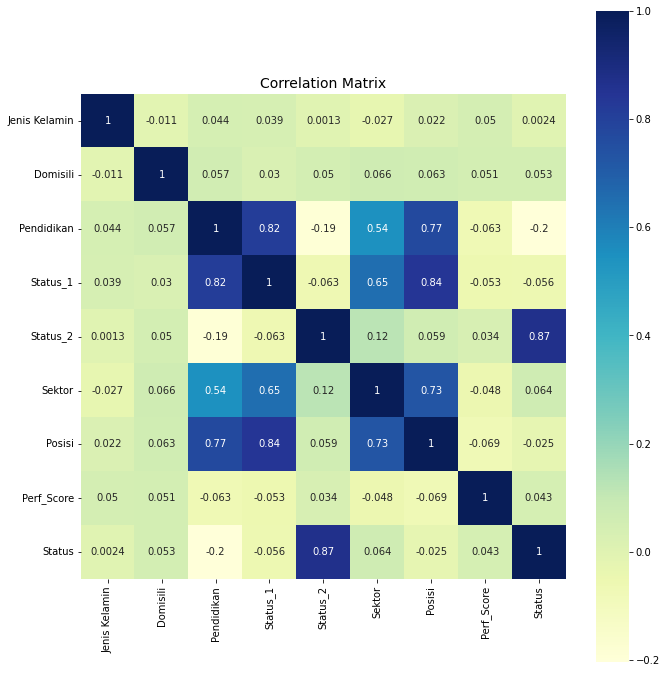

In [61]:
# Correlation Matrix with Heatmap
fig = plt.figure(figsize=(10,10))
corr = df_labeled[['Jenis Kelamin', 'Domisili', 'Pendidikan', 'Status_1', 'Status_2', 'Sektor', 'Posisi', 'Perf_Score', 'Status']].corr()
sns.heatmap(corr, annot=True, square=True, cmap='YlGnBu')
plt.title('Correlation Matrix', fontsize=14)
plt.yticks(rotation=0)
plt.tight_layout(pad=2)
plt.show()

*   Sektor and Posisi have a high correlation with Pendidikan and Status_1.
*   Whereas, Sektor itself also have a high correlation with Posisi.



## **Modelling & Evaluation**

Population's Proportion test is used here to demonstrate the inferential statistical analysis about hypothesis related to the proportion of population. There are 3 kinds of hypothesis that come in this analysis to be demontrated of with this test.

Whereas, Logistic Regression test is used here to find the most important feature from existing variables related to the labeled status about employed and unemployed one in the dataset. The reason why Logistic Regression is used rather than any regression method is because its dependent variable is delivered as the form of labeled variable, employed and unemployed.

### **Hypothesis 1 : Proportion of 2 Populations by Z-Test**

In [62]:
# Two-Tailed Test
# H0 : P1 = P2
# H1 : P1 != P2

# One-Tailed Test
# H0 : P1 >= P2
# H1 : P1 < P2

x1 = education['Unemployed'][['SMP', 'SMA', 'SMK']].sum()
x2 = education['Employed'][['SMP', 'SMA', 'SMK']].sum()
n1 = education['Unemployed'].sum()
n2 = education['Employed'].sum()

p1 = x1/n1
p2 = x2/n2
p = (x1 + x2)/(n1 + n2)

Z = (p1 - p2)/np.sqrt(p*(1-p)*((1/n1) + (1/n2))) # Significance level = 0.05
pval_1 = 2*dist.norm.cdf(-np.abs(Z))
pval_2 = dist.norm.cdf(-np.abs(Z))

# Define the result of res_1 and inf_1
res = []
inf = []
if Z < -1.96 or Z > 1.96 :
  res.append('reject H0')
  inf.append('P1 & P2 are different')
else:
  res.append('accept H0')
  inf.append('P1 & P2 are same')

# Define the result of res_2 and inf_2
#res = []
#inf = []
if Z < -1.96 :
  res.append('reject H0')
  inf.append('P1 is less than P2')
else:
  res.append('accept H0')
  inf.append('P1 is larger than P2')

print('P1 = Proportion number of employees who are graduated from SMP, SMA, and SMK which are unemployed ({0:0.2f})' .format(p1))
print('P2 = Proportion number of employees who are graduated from SMP, SMA, and SMK which are not unemployed ({0:0.2f})\n' .format(p2))

pd.DataFrame({'Type':('Two-Tailed', 'One-Tailed'), 'Test-Stat':(Z, Z),
              'P-Value':(pval_1, pval_2), 'Result':res, 'Inference':inf})

P1 = Proportion number of employees who are graduated from SMP, SMA, and SMK which are unemployed (0.75)
P2 = Proportion number of employees who are graduated from SMP, SMA, and SMK which are not unemployed (0.56)



,Type,Test-Stat,P-Value,Result,Inference
0,Two-Tailed,4.490672,0.000007,reject H0,P1 & P2 are different
1,One-Tailed,4.490672,0.000004,accept H0,P1 is larger than P2


### **Hypothesis 2 : Proportion of 2 Populations by Z-Test**

In [63]:
# Two-Tailed Test
# H0 : P1 = P2
# H1 : P1 != P2

# One-Tailed Test
# H0 : P1 >= P2
# H1 : P1 < P2

x1 = status_1['Unemployed'][['Pegawai Tetap', 'Kontrak']].sum()
x2 = status_1['Employed'][['Pegawai Tetap', 'Kontrak']].sum()
n1 = status_1['Unemployed'].sum()
n2 = status_1['Employed'].sum()

p1 = x1/n1
p2 = x2/n2
p = (x1 + x2)/(n1 + n2)

Z = (p1 - p2)/np.sqrt(p*(1-p)*((1/n1) + (1/n2))) # Significance level = 0.05
pval_1 = 2*dist.norm.cdf(-np.abs(Z))
pval_2 = dist.norm.cdf(-np.abs(Z))

# Define the result of res_1 and inf_1
res = []
inf = []
if Z < -1.96 or Z > 1.96 :
  res.append('reject H0')
  inf.append('P1 & P2 are different')
else:
  res.append('accept H0')
  inf.append('P1 & P2 are same')

# Define the result of res_2 and inf_2
#res = []
#inf = []
if Z < -1.96 :
  res.append('reject H0')
  inf.append('P1 is less than P2')
else:
  res.append('accept H0')
  inf.append('P1 is larger than P2')

print('P1 = Proportion number of permanent and contract employees who are unemployed ({0:0.2f})' .format(p1))
print('P2 = Proportion number of permanent and contract employees who are not unemployed ({0:0.2f})\n' .format(p2))

pd.DataFrame({'Type':('Two-Tailed', 'One-Tailed'), 'Test-Stat':(Z, Z),
              'P-Value':(pval_1, pval_2), 'Result':res, 'Inference':inf})

P1 = Proportion number of permanent and contract employees who are unemployed (0.93)
P2 = Proportion number of permanent and contract employees who are not unemployed (0.83)



,Type,Test-Stat,P-Value,Result,Inference
0,Two-Tailed,3.716861,0.000202,reject H0,P1 & P2 are different
1,One-Tailed,3.716861,0.000101,accept H0,P1 is larger than P2


### **Hypothesis 3 : Proportion of 2 Populations by Z-Test**

In [64]:
# Two-Tailed Test
# H0 : P1 = P2
# H1 : P1 != P2

# One-Tailed Test
# H0 : P1 >= P2
# H1 : P1 < P2

x1 = sector['Unemployed'][['Akomodasi & Makanan Minuman']].sum()
x2 = sector['Employed'][['Akomodasi & Makanan Minuman']].sum()
n1 = sector['Unemployed'].sum()
n2 = sector['Employed'].sum()

p1 = x1/n1
p2 = x2/n2
p = (x1 + x2)/(n1 + n2)

Z = (p1 - p2)/np.sqrt(p*(1-p)*((1/n1) + (1/n2))) # Significance level = 0.05
pval_1 = 2*dist.norm.cdf(-np.abs(Z))
pval_2 = dist.norm.cdf(-np.abs(Z))

# Define the result of res_1 and inf_1
res = []
inf = []
if Z < -1.96 or Z > 1.96 :
  res.append('reject H0')
  inf.append('P1 & P2 are different')
else:
  res.append('accept H0')
  inf.append('P1 & P2 are same')

# Define the result of res_2 and inf_2
#res = []
#inf = []
if Z < -1.96 :
  res.append('reject H0')
  inf.append('P1 is less than P2')
else:
  res.append('accept H0')
  inf.append('P1 is larger than P2')

print('P1 = Proportion number of FnB sector employees who are unemployed ({0:0.2f})' .format(p1))
print('P2 = Proportion number of FnB sector employees who are not unemployed ({0:0.2f})\n' .format(p2))

pd.DataFrame({'Type':('Two-Tailed', 'One-Tailed'), 'Test-Stat':(Z, Z),
              'P-Value':(pval_1, pval_2), 'Result':res, 'Inference':inf})

P1 = Proportion number of FnB sector employees who are unemployed (0.35)
P2 = Proportion number of FnB sector employees who are not unemployed (0.15)



,Type,Test-Stat,P-Value,Result,Inference
0,Two-Tailed,5.107755,3.260095e-07,reject H0,P1 & P2 are different
1,One-Tailed,5.107755,1.630047e-07,accept H0,P1 is larger than P2


### **Important Features : Logistic Regression Test**



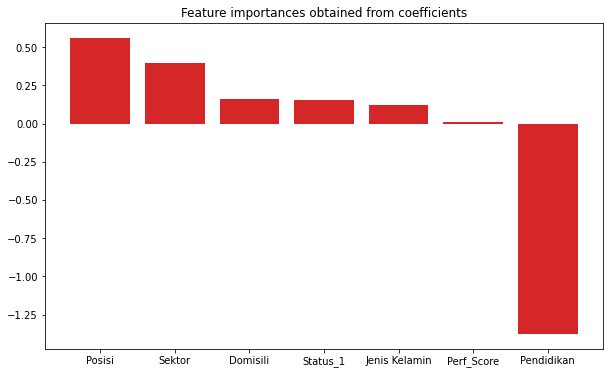

       Attribute  Importance
0         Posisi    0.562024
1         Sektor    0.394633
2       Domisili    0.157170
3       Status_1    0.153231
4  Jenis Kelamin    0.121747
5     Perf_Score    0.011649
6     Pendidikan   -1.377043


In [65]:
# Logistic Regression
X = df_labeled.drop(['ID', 'Status', 'Status_2'], axis=1)
y = df_labeled['Status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)



model = LogisticRegression()
model.fit(X_train_scaled, y_train)
importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': model.coef_[0]
})
importances = importances.sort_values(by='Importance', ascending=False).reset_index(drop=True)

plt.figure(figsize=(10,6))
plt.bar(x=importances['Attribute'], height=importances['Importance'], color='tab:red')
plt.title('Feature importances obtained from coefficients')
plt.show()
print('==========================')
print(importances)

## **Conclusion**

*   Out of 500 employees, 198 of them are Employed and 302 of them are Unemployed.
*   The total number of male employees categorized as unemployed are more than the female one.
*   The number of employees who graduated from SMK becomes the highest number of the unemployed one while compared to the other educational background, followed by SMA.
*   Employees' positions who have the highest unemployed number among all of the positions are operation position, followed by cleaning service. For operation position, 100% of them who unemployed came from SMK. Whereas, for cleaning service, most of them came from SMA, followed by SMP and SMK. Both of the positions were dominated by male employees.
*   Sector that has the highest number of unemployed one is Akomodasi & Makanan Minuman (FnB) with mayority comes from operation position.
*   The most important feature variabels in determining which one is employed and unemployed are position and sector respectively.





